In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Load Dataset

In [3]:
#load data
df = pd.read_csv("student_data.csv")
df.head()

,Student_ID,First Name,Last Name,Age,Gender,DSA_Marks,PowerBI_Marks,Web_Development_Marks,SQL_Marks,Machine_Learning_Marks,Email,Password
0,1,Aditya,Aggarwal,19,Male,35,56,36,77,25,aditya.aggarwal@gmail.com,aditya7904
1,2,Diya,Gupta,16,Male,86,96,75,86,18,diya.gupta@gmail.com,diya1028
2,3,Gargi,Chaudhary,21,Female,40,65,80,97,37,gargi.chaudhary@gmail.com,gargi7331
3,4,Aditya,Singh,24,Male,73,68,93,87,59,aditya.singh@gmail.com,aditya8263
4,5,Aisha,Gupta,20,Male,35,84,41,97,47,aisha.gupta@gmail.com,aisha2876


In [4]:
df.tail()

,Student_ID,First Name,Last Name,Age,Gender,DSA_Marks,PowerBI_Marks,Web_Development_Marks,SQL_Marks,Machine_Learning_Marks,Email,Password
99995,99996,Aarav,Sethi,19,Female,59,50,45,65,34,aarav.sethi@gmail.com,aarav3554
99996,99997,Isha,Nain,23,Male,98,95,84,61,63,isha.nain@gmail.com,isha6066
99997,99998,Harshit,Aggarwal,23,Male,97,95,32,61,38,harshit.aggarwal@gmail.com,harshit8415
99998,99999,Karan,Chaudhary,18,Male,76,77,47,84,60,karan.chaudhary@gmail.com,karan1669
99999,100000,Harsh,Sethi,24,Male,30,76,64,98,41,harsh.sethi@gmail.com,harsh2287


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Student_ID              100000 non-null  int64 
 1   First Name              100000 non-null  object
 2   Last Name               100000 non-null  object
 3   Age                     100000 non-null  int64 
 4   Gender                  100000 non-null  object
 5   DSA_Marks               100000 non-null  int64 
 6   PowerBI_Marks           100000 non-null  int64 
 7   Web_Development_Marks   100000 non-null  int64 
 8   SQL_Marks               100000 non-null  int64 
 9   Machine_Learning_Marks  100000 non-null  int64 
 10  Email                   100000 non-null  object
 11  Password                100000 non-null  object
dtypes: int64(7), object(5)
memory usage: 9.2+ MB


In [6]:
df.describe()

,Student_ID,Age,DSA_Marks,PowerBI_Marks,Web_Development_Marks,SQL_Marks,Machine_Learning_Marks
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,20.004310,59.558930,74.469650,64.591620,79.483970,54.434840
std,28867.657797,2.583362,23.098276,14.416467,20.228571,11.548711,25.991443
min,1.000000,16.000000,20.000000,50.000000,30.000000,60.000000,10.000000
25%,25000.750000,18.000000,40.000000,62.000000,47.000000,69.000000,32.000000
50%,50000.500000,20.000000,60.000000,74.000000,65.000000,80.000000,54.000000
75%,75000.250000,22.000000,80.000000,87.000000,82.000000,89.000000,77.000000
max,100000.000000,24.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [7]:
df.shape

(100000, 12)

# Data Cleaning 


In [8]:
pd.isna(df).sum()

Student_ID                0
First Name                0
Last Name                 0
Age                       0
Gender                    0
DSA_Marks                 0
PowerBI_Marks             0
Web_Development_Marks     0
SQL_Marks                 0
Machine_Learning_Marks    0
Email                     0
Password                  0
dtype: int64

- There is no null value present in data


# Outlier detection and removal


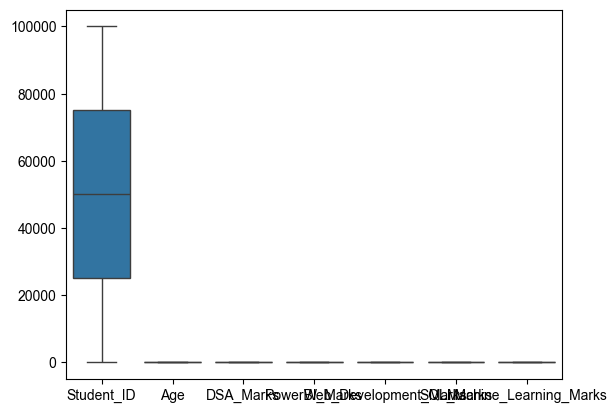

In [9]:
# creating box plot to check outliers
sns.boxplot(df)
sns.set(rc={"figure.figsize":(40,5)})

- According to above box plot there is no outlier in the dataset that means we are now ready for EDA.


# Exploratory Data Analysis(EDA)

In [10]:
df.columns

Index(['Student_ID', 'First Name', 'Last Name', 'Age', 'Gender', 'DSA_Marks',
       'PowerBI_Marks', 'Web_Development_Marks', 'SQL_Marks',
       'Machine_Learning_Marks', 'Email', 'Password'],
      dtype='object')

##### Let see what insights we can generate from the data
- Gender vs performance (line plot)
- Gender vs age (histogram)
- number of students in each subjects (piechart)
- Which top 5 students has Total maximum marks
- Which 10 students has least marks
- heatmap
- pairplot

### Gender vs performance (lineplot)

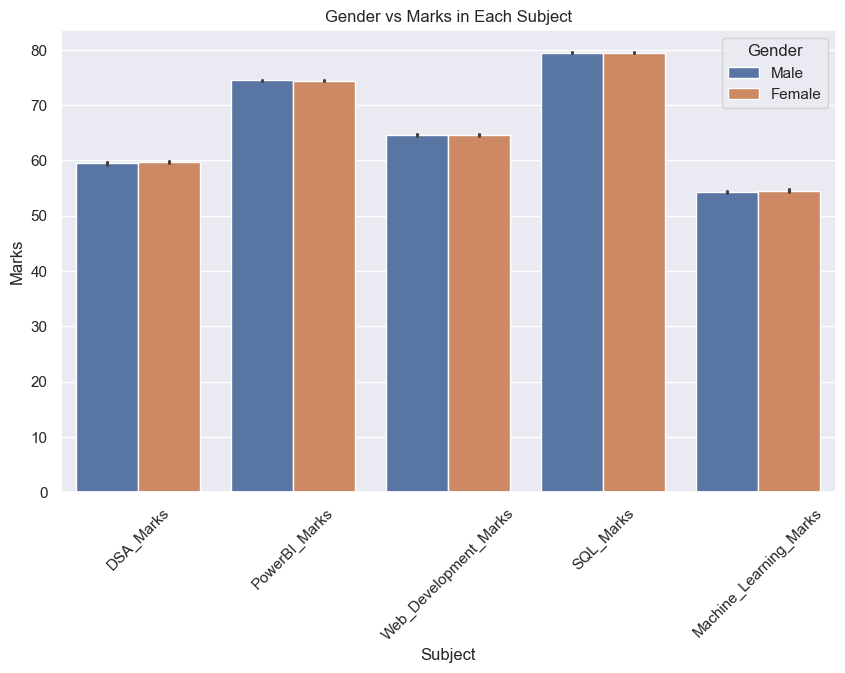

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the data to make it suitable for seaborn
df_melt = df.melt(id_vars=['Gender'], value_vars=['DSA_Marks', 'PowerBI_Marks', 'Web_Development_Marks', 'SQL_Marks', 'Machine_Learning_Marks'],
                  var_name='Subject', value_name='Marks')

# Plot a barplot to compare gender vs marks in each subject
plt.figure(figsize=(10, 6))
sns.barplot(x='Subject', y='Marks', hue='Gender', data=df_melt)
plt.title('Gender vs Marks in Each Subject')
plt.xticks(rotation=45)
plt.show()


### Gender Vs Age (Histogram)

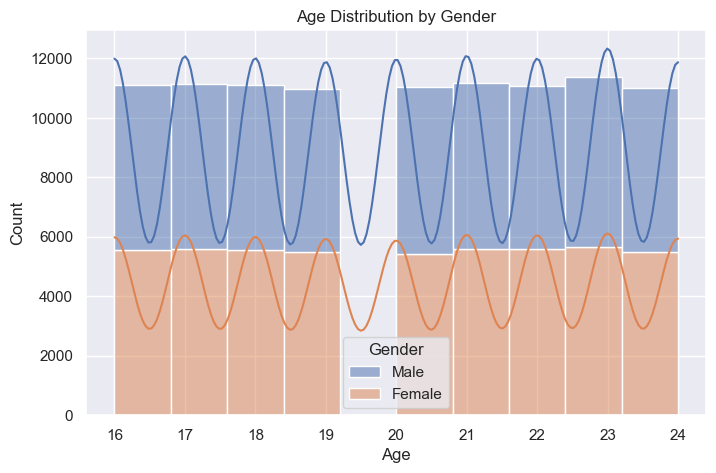

In [13]:
# Plot histogram for Age distribution by Gender
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', bins=10, kde=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Number of students in each subject (Piechart)

### Which top 5 students has Total maximum marks

### Which 10 students has least marks


### heatmap


### pairplot